In [6]:
!pip install tensorflow
!pip3 install torch torchvision torchaudio

   ---------------------------------------- 0.0/197.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/197.8 MB 991.0 kB/s eta 0:03:20
   ---------------------------------------- 0.1/197.8 MB 656.4 kB/s eta 0:05:02
   ---------------------------------------- 0.1/197.8 MB 1.1 MB/s eta 0:03:09
   ---------------------------------------- 0.3/197.8 MB 1.9 MB/s eta 0:01:44
   ---------------------------------------- 0.5/197.8 MB 2.0 MB/s eta 0:01:39
   ---------------------------------------- 0.6/197.8 MB 2.5 MB/s eta 0:01:19
   ---------------------------------------- 0.8/197.8 MB 2.8 MB/s eta 0:01:10
   ---------------------------------------- 1.1/197.8 MB 3.2 MB/s eta 0:01:03
   ---------------------------------------- 1.3/197.8 MB 3.4 MB/s eta 0:00:59
   ---------------------------------------- 1.6/197.8 MB 3.5 MB/s eta 0:00:56
   ---------------------------------------- 1.8/197.8 MB 3.7 MB/s eta 0:00:54
   ---------------------------------------- 2.0/197.8 MB 3.7 MB/s e

[INFO] accessing MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
[INFO] training network...
Epoch 1/25


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1472 - loss: 2.3203 - val_accuracy: 0.4135 - val_loss: 2.2379
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3899 - loss: 2.2242 - val_accuracy: 0.5259 - val_loss: 2.1647
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5445 - loss: 2.1461 - val_accuracy: 0.5911 - val_loss: 2.0618
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5935 - loss: 2.0340 - val_accuracy: 0.6132 - val_loss: 1.9105
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6384 - loss: 1.8730 - val_accuracy: 0.6826 - val_loss: 1.7053
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6679 - loss: 1.6644 - val_accuracy: 0.7151 - val_loss: 1.4775
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6987 - loss: 1.4365 - val_accuracy: 0.7391 - val_loss: 1.2712
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7323 - loss: 1.2409 - val_accuracy: 0.7642 - val_

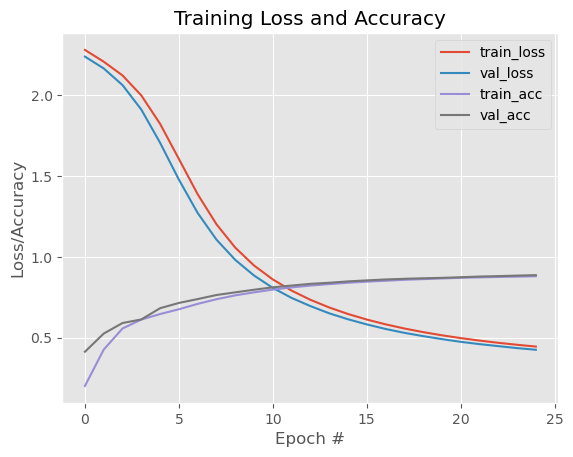

In [2]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

epochs = 25

print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),	epochs= epochs, batch_size=128)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),	predictions.argmax(axis=1),	target_names=[str(x) for x in lb.classes_]))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()



[INFO] loading CIFAR-10 data...
A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 157s 1us/step


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] training network...
Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3010 - loss: 1.9449 - val_accuracy: 0.3871 - val_loss: 1.7160
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4115 - loss: 1.6718 - val_accuracy: 0.3100 - val_loss: 1.9480
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4444 - loss: 1.5733 - val_accuracy: 0.4473 - val_loss: 1.5593
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4673 - loss: 1.5214 - val_accuracy: 0.4564 - val_loss: 1.5079
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4805 - loss: 1.4679 - val_accuracy: 0.4764 - val_loss: 1.4711
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4990 - loss: 1.4283 - val_accuracy: 0.4798 - val_loss: 1.4755
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5134 - loss: 1.3858 - val_accuracy: 0.4890 - val_loss: 1.4514
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17m

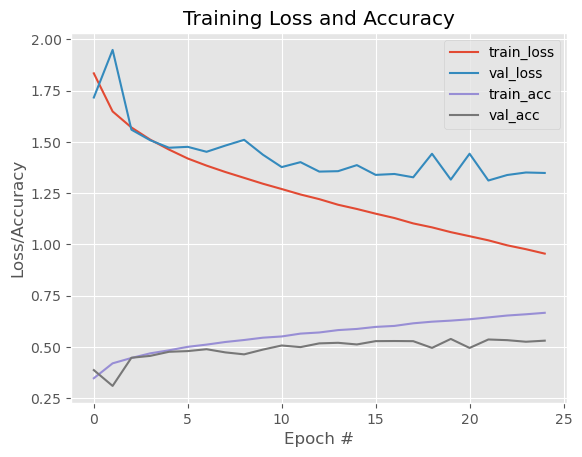

In [3]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse

print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),	epochs=epochs, batch_size=32)

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


[INFO] loading CIFAR-10 data...


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] training network...
Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.2989 - loss: 1.9458 - val_accuracy: 0.3549 - val_loss: 1.7638
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4124 - loss: 1.6671 - val_accuracy: 0.4306 - val_loss: 1.6227
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4425 - loss: 1.5815 - val_accuracy: 0.4505 - val_loss: 1.5466
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4678 - loss: 1.5211 - val_accuracy: 0.4440 - val_loss: 1.5366
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4844 - loss: 1.4605 - val_accuracy: 0.4571 - val_loss: 1.5125
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4999 - loss: 1.4163 - val_accuracy: 0.4607 - val_loss: 1.5376
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5127 - loss: 1.3939 - val_accuracy: 0.4701 - val_loss: 1.4632
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20m

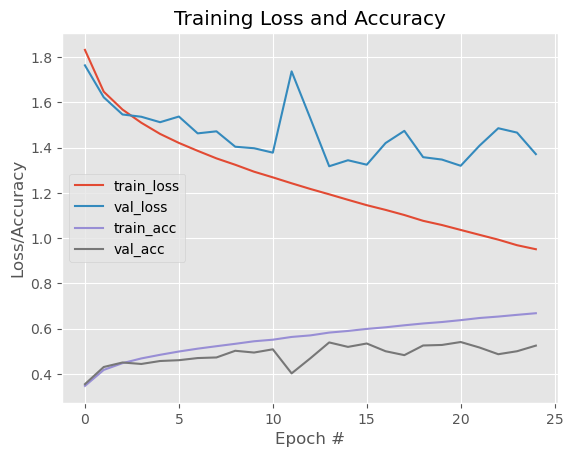

In [4]:

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),	epochs=epochs, batch_size=32)

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:21<00:00, 467515.31it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 59975.05it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:04<00:00, 387614.64it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw


Training with SGD optimizer
Epoch [1/10], Loss: 2.2691
Epoch [2/10], Loss: 2.1395
Epoch [3/10], Loss: 1.9355
Epoch [4/10], Loss: 1.6499
Epoch [5/10], Loss: 1.3285
Epoch [6/10], Loss: 1.0485
Epoch [7/10], Loss: 0.8486
Epoch [8/10], Loss: 0.7159
Epoch [9/10], Loss: 0.6276
Epoch [10/10], Loss: 0.5671
SGD Test Accuracy: 86.72%

Training with Adam optimizer
Epoch [1/10], Loss: 0.4309
Epoch [2/10], Loss: 0.2051
Epoch [3/10], Loss: 0.1453
Epoch [4/10], Loss: 0.1152
Epoch [5/10], Loss: 0.0970
Epoch [6/10], Loss: 0.0880
Epoch [7/10], Loss: 0.0751
Epoch [8/10], Loss: 0.0659
Epoch [9/10], Loss: 0.0605
Epoch [10/10], Loss: 0.0561
Adam Test Accuracy: 97.43%

Training with RMSprop optimizer
Epoch [1/10], Loss: 0.4430
Epoch [2/10], Loss: 0.2246
Epoch [3/10], Loss: 0.1646
Epoch [4/10], Loss: 0.1358
Epoch [5/10], Loss: 0.1139
Epoch [6/10], Loss: 0.1007
Epoch [7/10], Loss: 0.0913
Epoch [8/10], Loss: 0.0803
Epoch [9/10], Loss: 0.

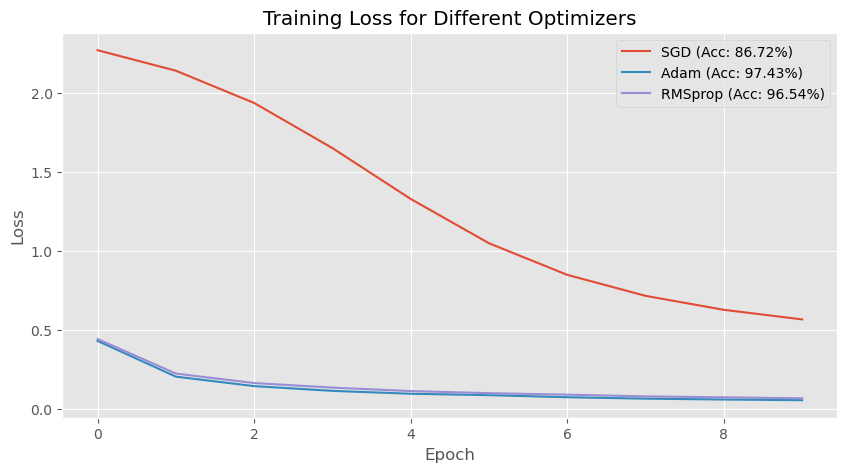

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Define the Feed-forward Neural Network
class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define a function to train the network
def train(model, optimizer, criterion, train_loader, num_epochs=5):
    model.train()
    train_loss = []
    for epoch in range(num_epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_loss.append(epoch_loss / len(train_loader))
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}')
    return train_loss

# Define a function to evaluate the network
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Train and evaluate the model with different optimizers
optimizers = {
    'SGD': optim.SGD,
    'Adam': optim.Adam,
    'RMSprop': optim.RMSprop
}

num_epochs = 10
results = {}

for opt_name, opt in optimizers.items():
    print(f'\nTraining with {opt_name} optimizer')
    model = FFNN().to(device)
    optimizer = opt(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_loss = train(model, optimizer, criterion, train_loader, num_epochs)
    accuracy = evaluate(model, test_loader)
    results[opt_name] = (train_loss, accuracy)
    print(f'{opt_name} Test Accuracy: {accuracy:.2f}%')

# Plot the training loss for each optimizer
plt.figure(figsize=(10, 5))
for opt_name, (train_loss, accuracy) in results.items():
    plt.plot(train_loss, label=f'{opt_name} (Acc: {accuracy:.2f}%)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Different Optimizers')
plt.legend()
plt.show()


[INFO] accessing MNIST...
[INFO] training network with SGD optimizer...


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] evaluating network with SGD optimizer...
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.96      0.97      0.96      1135
           2       0.92      0.88      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.93      0.91       982
           5       0.88      0.84      0.86       892
           6       0.92      0.94      0.93       958
           7       0.92      0.91      0.92      1028
           8       0.88      0.86      0.87       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[INFO] training network with Adam optimizer...


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] evaluating network with Adam optimizer...
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[INFO] training network with RMSprop optimizer...


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] evaluating network with RMSprop optimizer...
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



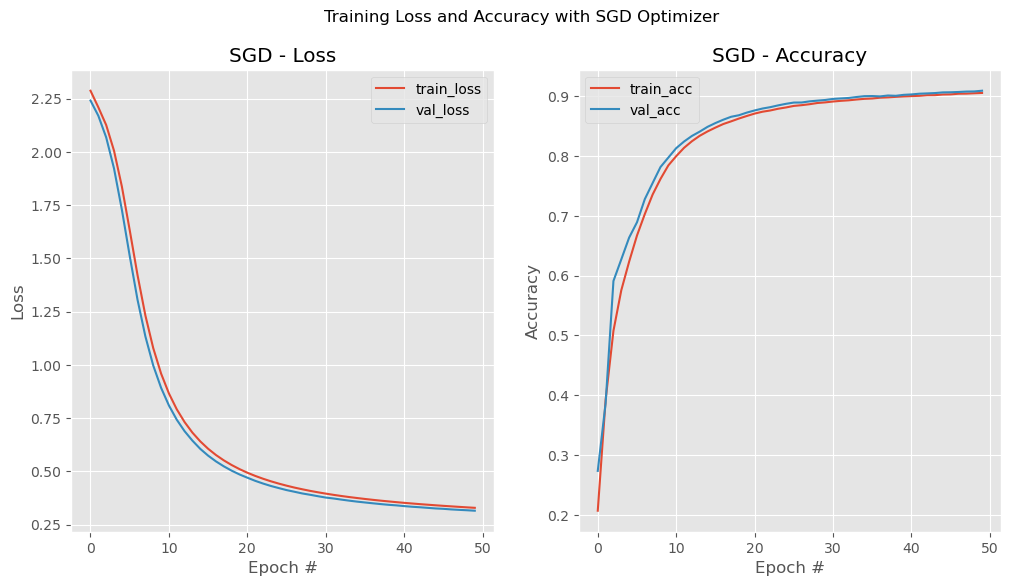

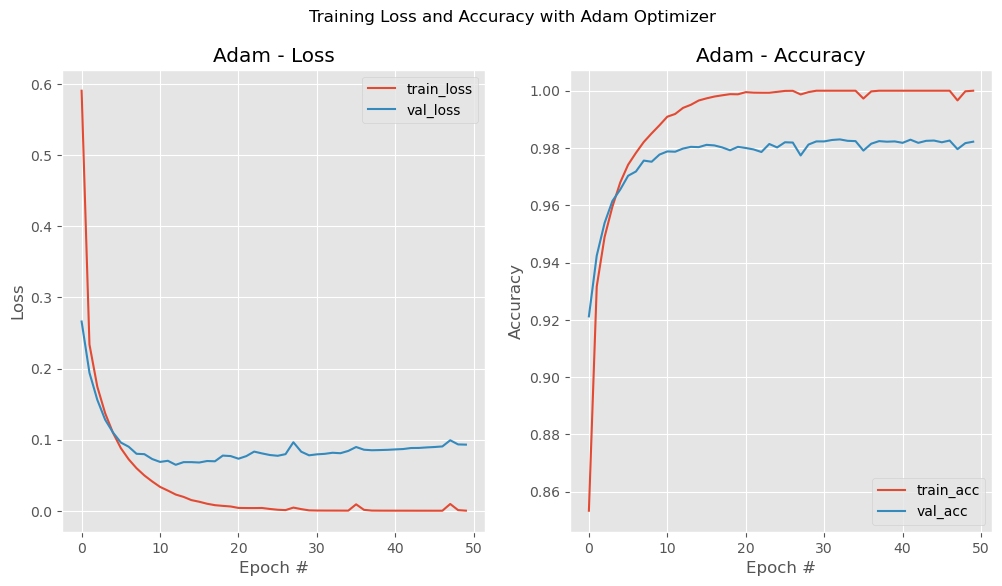

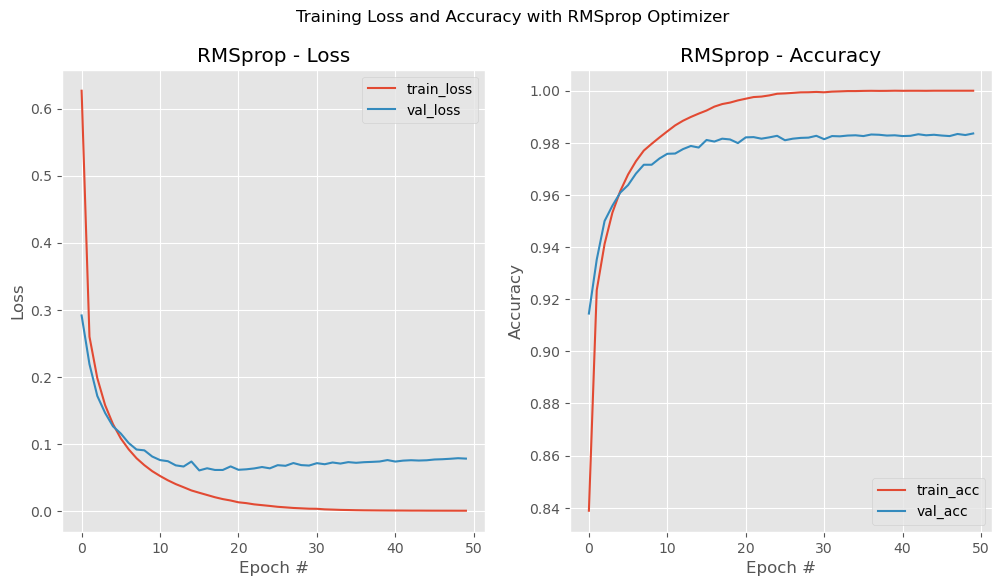

In [8]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# grab the MNIST dataset
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# flatten the images to 28*28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# define the model architecture
def build_model():
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
    model.add(Dense(128, activation="sigmoid"))
    model.add(Dense(10, activation="softmax"))
    return model

# list of optimizers to train the model with
optimizers = {
    'SGD': SGD(0.01),
    'Adam': Adam(0.001),
    'RMSprop': RMSprop(0.001)
}

epochs = 50
results = {}

for opt_name, opt in optimizers.items():
    print(f"[INFO] training network with {opt_name} optimizer...")
    model = build_model()
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=128, verbose=0)

    # evaluate the network
    print(f"[INFO] evaluating network with {opt_name} optimizer...")
    predictions = model.predict(testX, batch_size=128)
    print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

    # store the results
    results[opt_name] = H

# plot the results
plt.style.use("ggplot")

for opt_name, H in results.items():
    plt.figure(figsize=(12, 6))

    # plot loss
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.title(f"{opt_name} - Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()

    # plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title(f"{opt_name} - Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.suptitle(f"Training Loss and Accuracy with {opt_name} Optimizer")
    plt.show()
